# Linear Regression with Dataset ***Wine Quality***
- https://archive.ics.uci.edu/dataset/186/wine+quality

# Fetch and read data

In [3]:
%pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

df = pd.concat([X, y], axis=1)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Descibe data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5318 non-null   float64
 1   volatile_acidity      5318 non-null   float64
 2   citric_acid           5318 non-null   float64
 3   residual_sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free_sulfur_dioxide   5318 non-null   float64
 6   total_sulfur_dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 540.1 KB


In [15]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
# Check duplicated rows
print("Duplicated rows: ", df.duplicated().sum())

Duplicated rows:  1179


In [9]:
# Remove duplicated rows
df = df.drop_duplicates()

In [10]:
# Check duplicated rows
print("Duplicated rows: ", df.duplicated().sum())

Duplicated rows:  0


In [35]:
df.shape

(5318, 12)

# Features selection

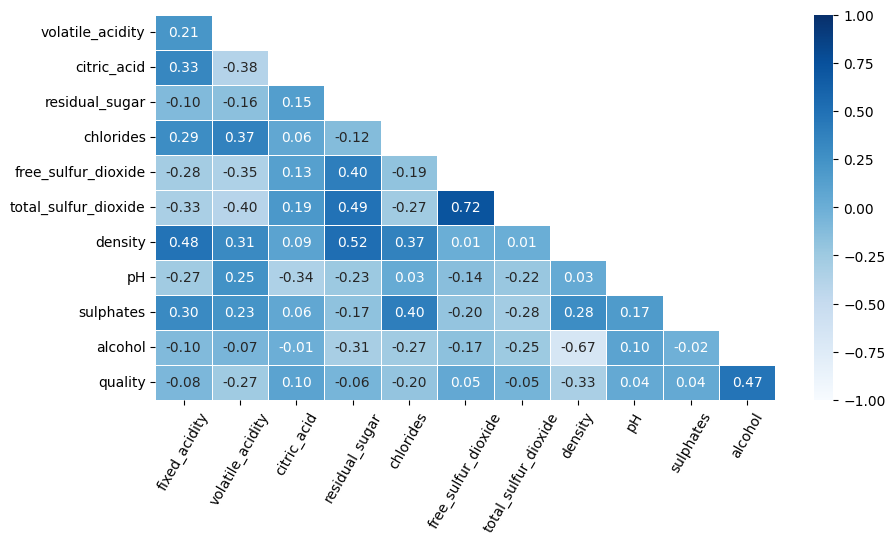

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create heatmap on numerical features
corr_df = df.corr()

mask = np.ones_like(corr_df, dtype = bool)
mask = np.triu(mask)

adj_corr_df = corr_df.iloc[1:,:-1]
adj_mask = mask[1:,:-1]

plt.style.use('default')

fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(
    data = adj_corr_df,
    mask = adj_mask,
    cmap = "Blues",
    linecolor = "White",
    linewidth = 0.5,
    annot = True,
    fmt = ".2f",
    vmin = -1,
    vmax = 1
)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.show()

> Chọn feature 'alcohol' vì khi nhìn ở hình trên thì sự tương quan của 'alcohol' và 'quality' là 0.47

In [41]:
X = df.drop('quality', axis=1)
y = df['quality']

# Train & test split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X.shape, y.shape

((5318, 11), (5318,))

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4254, 11), (1064, 11), (4254,), (1064,))

In [48]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
4624,5.4,0.220,0.29,1.2,0.045,69.0,152.0,0.99178,3.76,0.63,11.0
589,10.2,0.290,0.49,2.6,0.059,5.0,13.0,0.99760,3.05,0.74,10.5
67,6.6,0.705,0.07,1.6,0.076,6.0,15.0,0.99620,3.44,0.58,10.7
5811,6.6,0.310,0.37,6.2,0.052,13.0,164.0,0.99602,3.24,0.39,8.8
4421,6.5,0.200,0.24,9.2,0.044,25.0,150.0,0.99502,3.22,0.44,10.5


# Feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train model

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
df_result = pd.DataFrame({"y_true": y_test, "y_pred": y_pred}).reset_index(drop=True)

In [54]:
df_result.head(10)

,y_true,y_pred
0,6,6.464036
1,6,6.096426
2,6,6.169937
3,5,6.097884
4,6,6.423769
5,6,6.502876
6,5,5.548814
7,5,5.612588
8,6,5.681299
9,6,6.080409


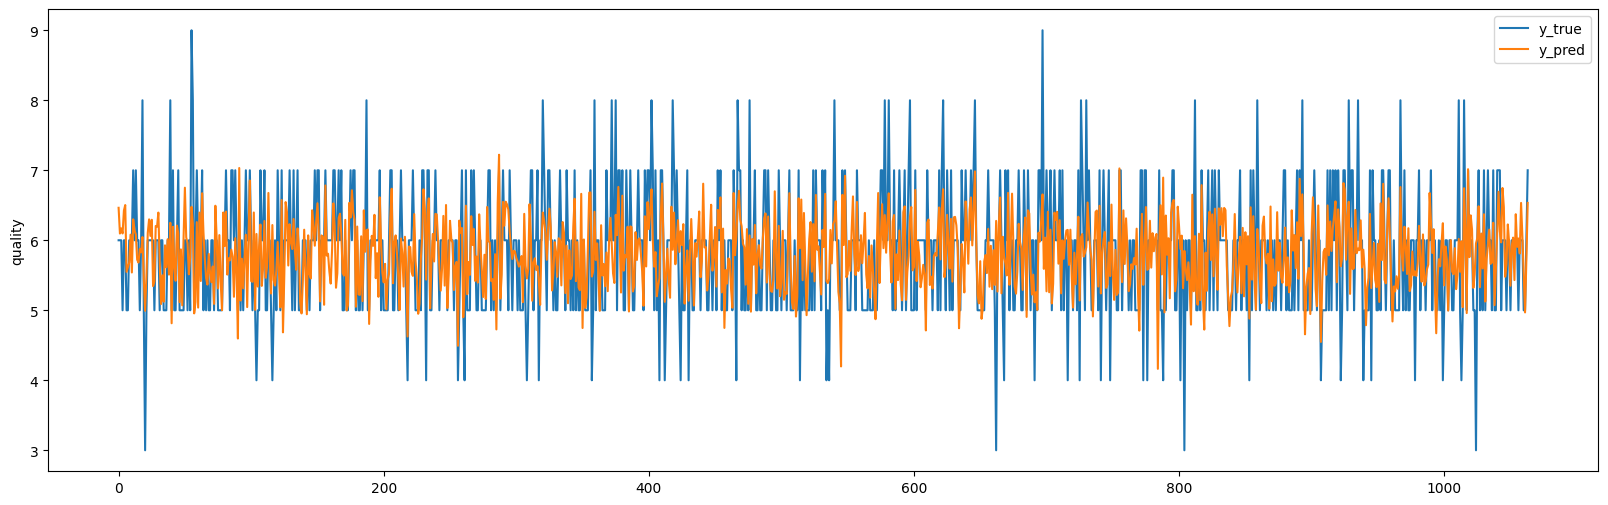

In [59]:
plt.figure(figsize=(20,6))
plt.plot(df_result["y_true"], label="y_true")
plt.plot(df_result["y_pred"], label="y_pred")
plt.legend()
plt.ylabel("quality")
plt.show()

# Evaluation

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred)}")
print(f"R-squared (R2): {r2_score(y_test, y_pred)}")

Mean Squared Error (MSE): 0.5096514373697587
Mean Absolute Error (MAE): 0.5520365984973948
Root Mean Squared Error (RMSE): 0.7138987584873353
R-squared (R2): 0.3206183782186054
